2D Pressure Vessel {#2d_pressure_vessel_example}
==================

This workshop demonstrates how to create a basic pressure vessel and
apply a pressure to it.

Objective
---------

In this example we will perform stress analysis of pipe due to internal
pressure. Due to the symmetry in geometry and loading, the strain along
its axis is negligible and therefore we model this system as 2D plane
strain.

Procedure
---------

-   Launch MAPDL instance
-   Converting MAPDL script file to pyMAPDL
    1. Using `pymapdl convert` command utility
    2. Using `pymapdl.convert_script()` method
-   Create function to run the pymapdl script for varying mesh sizes
-   Automate mesh convergence study
-   Plot results of interest

Additional Packages Used
------------------------

-   [Matplotlib](https://matplotlib.org) is used for plotting purposes.
-   [NumPy](https://numpy.org) is used for using NumPy arrays.

Workshop Starts
--------------

After converting the script proceed to modify below where ` your script goes here `


In [1]:
import matplotlib.pyplot as plt

Launch MAPDL
============


In [2]:
import numpy as np

from ansys.mapdl.core import launch_mapdl

# start mapdl
mapdl = ###############your script goes here###########################

Setup the pipe cross section using Python function

We use a function here so we can rebuild the pipe using parameters
rather than calling a script several times.


In [4]:
def pipe_plane_strain(e, nu, inner_radius, outer_radius, pressure, element_size):
    """Create 2D cross section modeling a pipe."""

    ###############your script goes here###########################


    ###############################################################
    max_eqv_stress = np.max(mapdl.post_processing.nodal_eqv_stress())
    all_dof = mapdl.mesh.nnum_all
    num_dof = all_dof.size

    return num_dof, max_eqv_stress

Perform the mesh convergence study
==================================


In [5]:
# Define model input parameters
rad1 = 175  # Internal radius
rad2 = 200  # External radius
pressure = 100

e = 2e5  # Young's modulus
nu = 0.3  # Poisson's ratio

# Define mesh convergence parameters
num_dof = []
max_stress = []

# element size: use log space since mesh converges logarithmically
esizes = np.logspace(1.4, 0, 20)

# run the mesh convergence and output the results on the fly
for esize in esizes:
    dof, eqv_stress = ###############your script goes here###########################
    num_dof.append(dof)
    max_stress.append(eqv_stress)
    print(f"DOF: {dof:5d}   Stress: {eqv_stress:.2f} MPa")

DOF:    28   Stress: 702.42 MPa
DOF:    48   Stress: 725.72 MPa
DOF:    57   Stress: 725.63 MPa
DOF:    66   Stress: 725.57 MPa
DOF:    78   Stress: 725.52 MPa
DOF:   124   Stress: 733.64 MPa
DOF:   144   Stress: 733.62 MPa
DOF:   215   Stress: 737.75 MPa
DOF:   250   Stress: 737.74 MPa
DOF:   354   Stress: 740.25 MPa
DOF:   490   Stress: 741.93 MPa
DOF:   656   Stress: 743.13 MPa
DOF:   873   Stress: 744.04 MPa
DOF:  1265   Stress: 745.32 MPa
DOF:  1632   Stress: 745.78 MPa
DOF:  2254   Stress: 746.50 MPa
DOF:  3230   Stress: 747.24 MPa
DOF:  4275   Stress: 747.60 MPa
DOF:  6141   Stress: 748.12 MPa
DOF:  8216   Stress: 748.40 MPa


Plot mesh convergence results
=============================

Draw a dotted line showing the convergence value


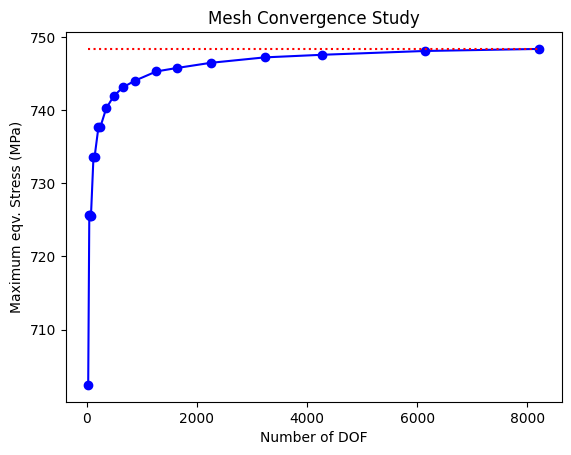

In [6]:
plt.plot(num_dof, max_stress, "b-o")
plt.plot([num_dof[0], num_dof[-1]], [max_stress[-1], max_stress[-1]], "r:")
plt.title("Mesh Convergence Study")
plt.xlabel("Number of DOF")
plt.ylabel("Maximum eqv. Stress (MPa)")

#show the plot
###############your script goes here###########################

Resume results from last analysis from mesh convergence study


c:\Devops\pyAnsys\workshop_env\lib\site-packages\pyvista\jupyter\notebook.py:37: UserWarning: Failed to use notebook backend: 

No module named 'trame'

Falling back to a static output.
  warnings.warn(


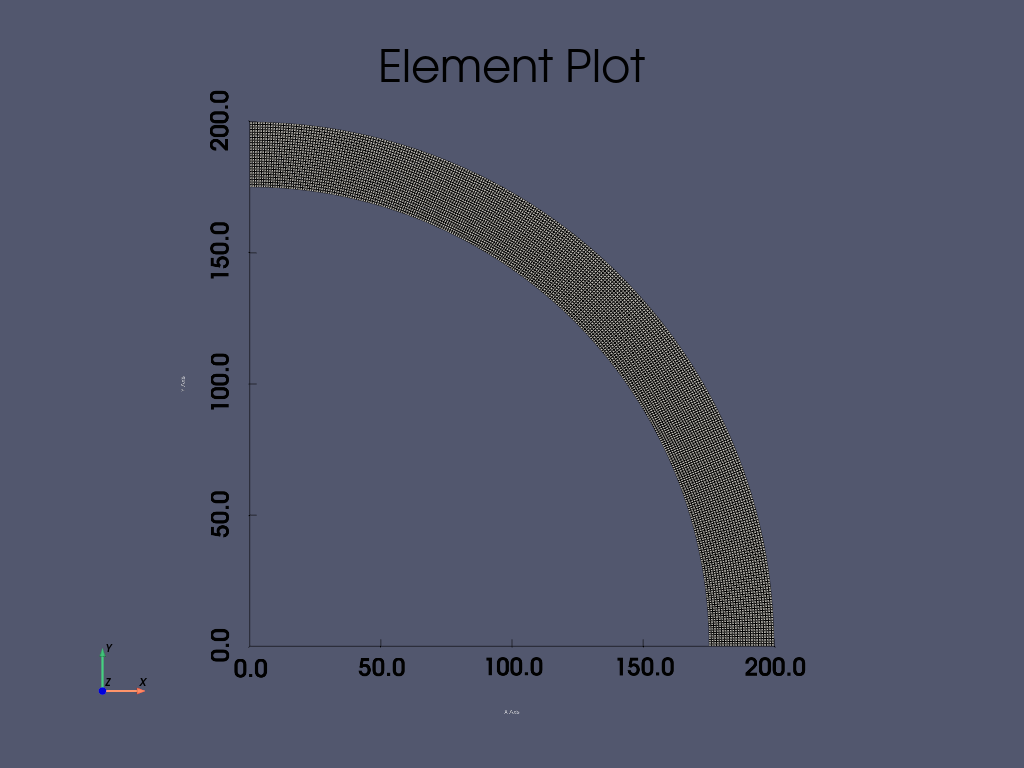

In [7]:
# Plot the final mesh used
mapdl.allsel("ALL")
mapdl.eplot(
    title="Element Plot",
    line_width=1,
    show_bounds=True,
    cpos="xy",
)

Plot nodal displacement
=======================

Enter post-processing (/POST1) and select the first load step


c:\Devops\pyAnsys\workshop_env\lib\site-packages\pyvista\jupyter\notebook.py:37: UserWarning: Failed to use notebook backend: 

No module named 'trame'

Falling back to a static output.
  warnings.warn(


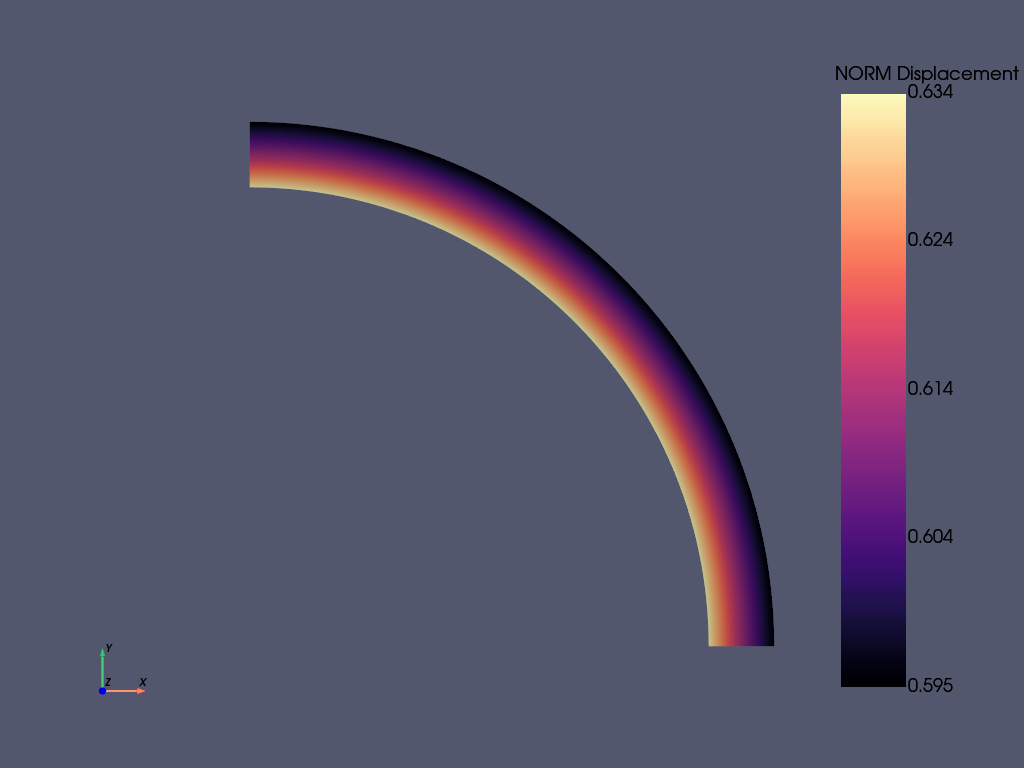

In [8]:
mapdl.post1()
mapdl.set(1, 1)

mapdl.post_processing.plot_nodal_displacement(
    "NORM",
    cpos="xy",
    cmap="magma",
)

Plot nodal equivalent stress
============================


c:\Devops\pyAnsys\workshop_env\lib\site-packages\pyvista\jupyter\notebook.py:37: UserWarning: Failed to use notebook backend: 

No module named 'trame'

Falling back to a static output.
  warnings.warn(


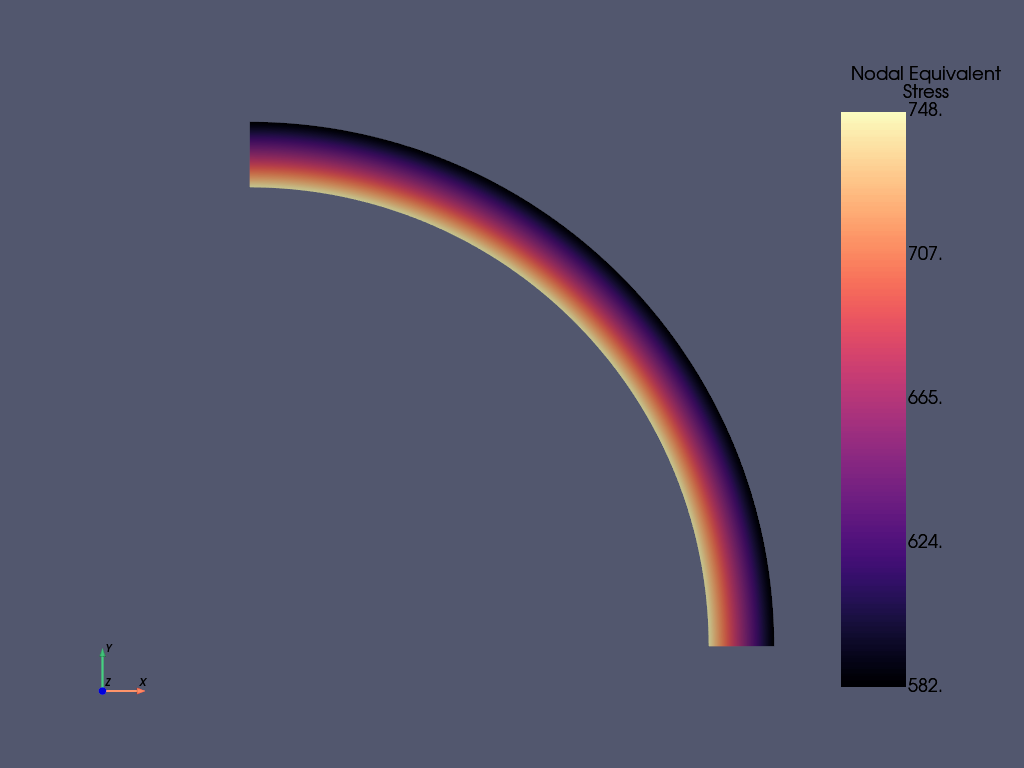

In [9]:
mapdl.post_processing.plot_nodal_eqv_stress(cpos="xy", cmap="magma")

Stop mapdl
==========


In [10]:
###############your script goes here###########################
